### Imports

In [ ]:
from image import load
from pathlib import Path
import matplotlib.pyplot as plt

from skimage.morphology import closing, square, erosion
from skimage.measure import label, regionprops

from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

import matplotlib.patches as mpatches

import numpy as np

### Load the image

In [ ]:
#cal_image = load("PRUEBA_LUIS.tif", for_calib = True)

file_path = Path("/home/luis/Dosepy/src/Dosepy") / "data" / "PRUEBA_LUIS.tif"
cal_image = load(file_path, for_calib = True)

pixels_to_remove_border = int(cal_image.dpmm * 3)
print(f"Pixels_to_remove_border: {pixels_to_remove_border}")

### Films detection

1. Grayscale for film identification using threshold
2. erosion is used to remove film border.

In [ ]:
grayscale = rgb2gray(cal_image.array)
thresh = threshold_otsu(grayscale)

binary = erosion(grayscale < thresh, square(pixels_to_remove_border))

label_image, num = label(binary, return_num = True)
print(f"Number of images detected: {num}")

# Films
films = regionprops(label_image, intensity_image = cal_image.array[:,:,1])

In [ ]:
from skimage.filters import sobel
mean = []
i = 1
for region in films:
    
    region.image_intensity[region.image_intensity == 0] = np.max(region.image_intensity)
    th = threshold_otsu(region.image_intensity)

    # Used for field detection inside the film
    bin = erosion(region.image_intensity < th)

    fig, axes = plt.subplots(ncols=2, figsize=(8, 2.5))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 2, 1)
    ax[1] = plt.subplot(1, 2, 2)

    ax[0].hist(region.image_intensity.ravel(), bins = 20)
    ax[1].imshow(bin)
    
    ax[0].axvline(th, color='r')
    ax[0].set_title(f"Film: {i}")

    lb = label(bin)
    reg = regionprops(lb, intensity_image = region.image_intensity)
    #print(reg[0].image_intensity.shape)
    print(reg[0].centroid)
    field = reg[0].image_intensity[10:-10,50:-50]
    #print(np.mean(field))
    ax[1].set_title(f"I: {np.mean(field)}")
    mean.append(np.mean(field))

    i += 1

mean[-1] = np.mean(films[-1].image_intensity[10:-10,50:-50])
sorted(mean)

### Use of get_stat

Number of images detected: 9


/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


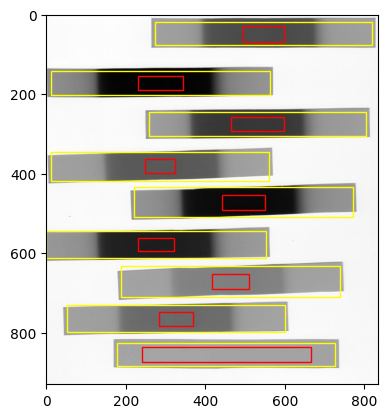

[23840.969696969696, 4335.211252068395, 18478.361587301588, 27333.726984126984, 6165.566666666667, 11634.465130568356, 36753.2127592709, 31711.204744069913, nan]


In [2]:
from image import load
from pathlib import Path

file_path = Path("/home/luis/Dosepy/src/Dosepy") / "data" / "PRUEBA_LUIS.tif"
cal_image = load(file_path, for_calib = True)

cal_image.get_stat(ar = 0.4)

In [ ]:
plt.show()